## **5.3 | Using a Pretrained Convolutional Network**

**5.16 | Instantiating the VGG16 Convolutionla Base**

In [ ]:
from keras.applications import VGG16
conv_base =  VGG16(weights='imagenet',
                   include_top=False,
                   input_shape=(150, 150, 3))

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

**5.17 | Extracting features using the Pretraind Convolutional Base**

In [ ]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

base_dir = '/content/drive/MyDrive/cats_and_dogs'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
  features = np.zeros(shape=(sample_count, 4, 4, 512))
  labels = np.zeros(shape=(sample_count))
  generator = datagen.flow_from_directory(
      directory,
      target_size=(150, 150),
      batch_size=batch_size,
      class_mode='binary')
  i = 0
  for inputs_batch, labels_batch in generator:
    features_batch = conv_base.predict(inputs_batch)
    features[i * batch_size : (i + 1) * batch_size] = features_batch
    labels [i * batch_size : (i + 1) * batch_size] = labels_batch
    i += 1
    if i * batch_size >= sample_count:
      break
  return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)





Found 2000 images belonging to 2 classes.
1/1 [==============================] - 4s 4s/step
Found 1000 images belonging to 2 classes.
1/1 [==============================] - 4s 4s/step
Found 1000 images belonging to 2 classes.
1/1 [==============================] - 4s 4s/step


In [4]:
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

 **5.18 | Defining and Training the Densely Connected Classifier**

In [5]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/30
100/100 [==============================] - 2s 15ms/step - loss: 0.6132 - acc: 0.6615 - val_loss: 0.4439 - val_acc: 0.8350
Epoch 2/30
100/100 [==============================] - 1s 13ms/step - loss: 0.4438 - acc: 0.7920 - val_loss: 0.3574 - val_acc: 0.8730
Epoch 3/30
100/100 [==============================] - 1s 13ms/step - loss: 0.3615 - acc: 0.8505 - val_loss: 0.3168 - val_acc: 0.8810
Epoch 4/30
100/100 [==============================] - 1s 13ms/step - loss: 0.3200 - acc: 0.8690 - val_loss: 0.2952 - val_acc: 0.8880
Epoch 5/30
100/100 [==============================] - 1s 14ms/step - loss: 0.2945 - acc: 0.8745 - val_loss: 0.3001 - val_acc: 0.8710
Epoch 6/30
100/100 [==============================] - 2s 19ms/step - loss: 0.2719 - acc: 0.8880 - val_loss: 0.2683 - val_acc: 0.8980
Epoch 7/30
100/100 [==============================] - 1s 14ms/step - loss: 0.2496 - acc: 0.8985 - val_loss: 0.2574 - val_acc: 0.9050
Epoch 8/30
100/100 [==============================] - 1s 13ms/step - 

**5.19 | Plotting the results**

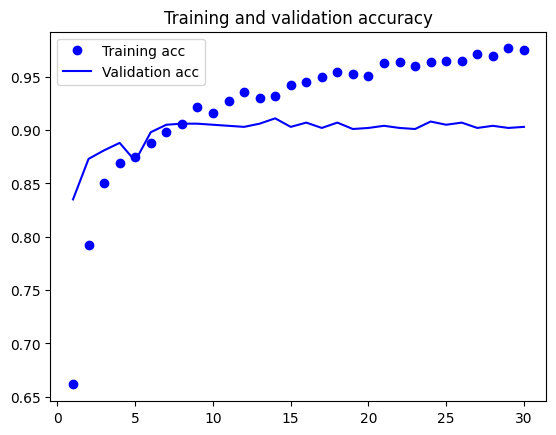

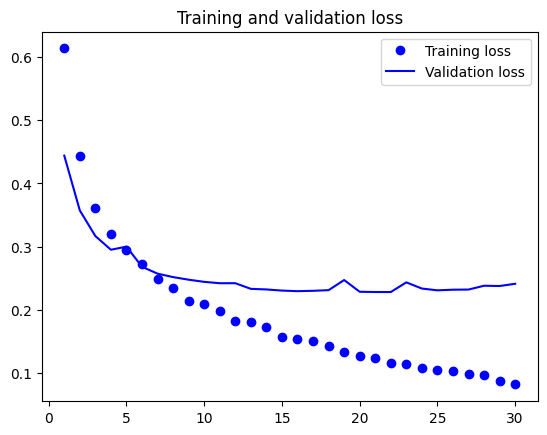

In [6]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()